<a href="https://colab.research.google.com/github/STASYA00/IAAC2024_tutorials/blob/main/notebooks/06_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> - Stasja's notebook

### Data

⚠️ **NOTE:** Kaggle files have already been uploaded to the repo. You find them in folder `kaggle_data`´

If you for any reason need to download data from kaggle, instructions are in one of the [optional notebooks](./88_kaggle_data.ipynb) : <a href="https://colab.research.google.com/github/STASYA00/IAAC2024_tutorials/blob/main/notebooks/88_kaggle_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/STASYA00/IAAC2024_tutorials
%cd IAAC2024_tutorials/notebooks

In [2]:
# importing the necessary packages
import calendar
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
metadata = pd.read_csv("../kaggle_data/tutorial_results/04_metadata.csv", index_col=0)
train = pd.read_csv("../kaggle_data/train.csv", index_col=0)
metadata.head()

,building_id,site_id,primaryspaceusage,sub_primaryspaceusage,sqm,timezone,electricity,hotwater,water,gas,industry,subindustry,heatingtype,yearbuilt,numberoffloors,occupants,rating
136,432,3,0,2,4703.0,1,0,0,0,0,0,2,11,0.0,5.0,378.9,1.0
137,416,3,0,2,499.3,1,0,1,0,0,0,2,7,0.0,4.0,104.8,0.0
138,436,3,0,2,9061.0,1,0,0,0,0,0,2,7,2005.0,10.0,523.2,2.0
139,441,3,0,3,7579.0,1,0,0,0,0,0,2,7,1913.0,5.0,517.9,0.0
140,442,3,0,3,5295.0,1,0,1,0,0,0,2,7,1953.0,6.0,378.9,1.0


In [4]:
full_df = train.merge(metadata, on='building_id', how='left')
full_df.head()

,building_id,day,meter,meter_reading,site_id,primaryspaceusage,sub_primaryspaceusage,sqm,timezone,electricity,hotwater,water,gas,industry,subindustry,heatingtype,yearbuilt,numberoffloors,occupants,rating
0,2,2016-02-02,595,102.6,0,1,4,811.0,1,0,0,0,1,1,9,5,1976.0,1.0,20.6,3.0
1,2,2016-02-02,207,0.3,0,1,4,811.0,1,0,0,0,1,1,9,5,1976.0,1.0,20.6,3.0
2,2,2016-02-03,595,88.8,0,1,4,811.0,1,0,0,0,1,1,9,5,1976.0,1.0,20.6,3.0
3,2,2016-02-03,207,0.1,0,1,4,811.0,1,0,0,0,1,1,9,5,1976.0,1.0,20.6,3.0
4,2,2016-02-04,595,76.3,0,1,4,811.0,1,0,0,0,1,1,9,5,1976.0,1.0,20.6,3.0


In [11]:
full_df["sub_primaryspaceusage"].value_counts()

sub_primaryspaceusage
20    100009
18     47775
2      27391
4      25480
3      17199
15      8918
7       7644
21      3822
8       3185
11      3185
10      3185
9       2548
12      1911
13      1911
23      1911
5       1274
1       1274
24      1274
22      1274
17      1274
0        637
16       637
25       637
19       637
14       637
6        637
Name: count, dtype: int64

In [5]:
target = "meter_reading"
meter_dict = {595:0, 207:1, 649:2, 413:3}
full_df["meter"].replace(meter_dict, inplace=True)
X = full_df.drop(columns=[target]).loc[full_df[target].isna()==False]
Y = full_df[target].loc[full_df[target].isna()==False]


#### 🫧 EDA

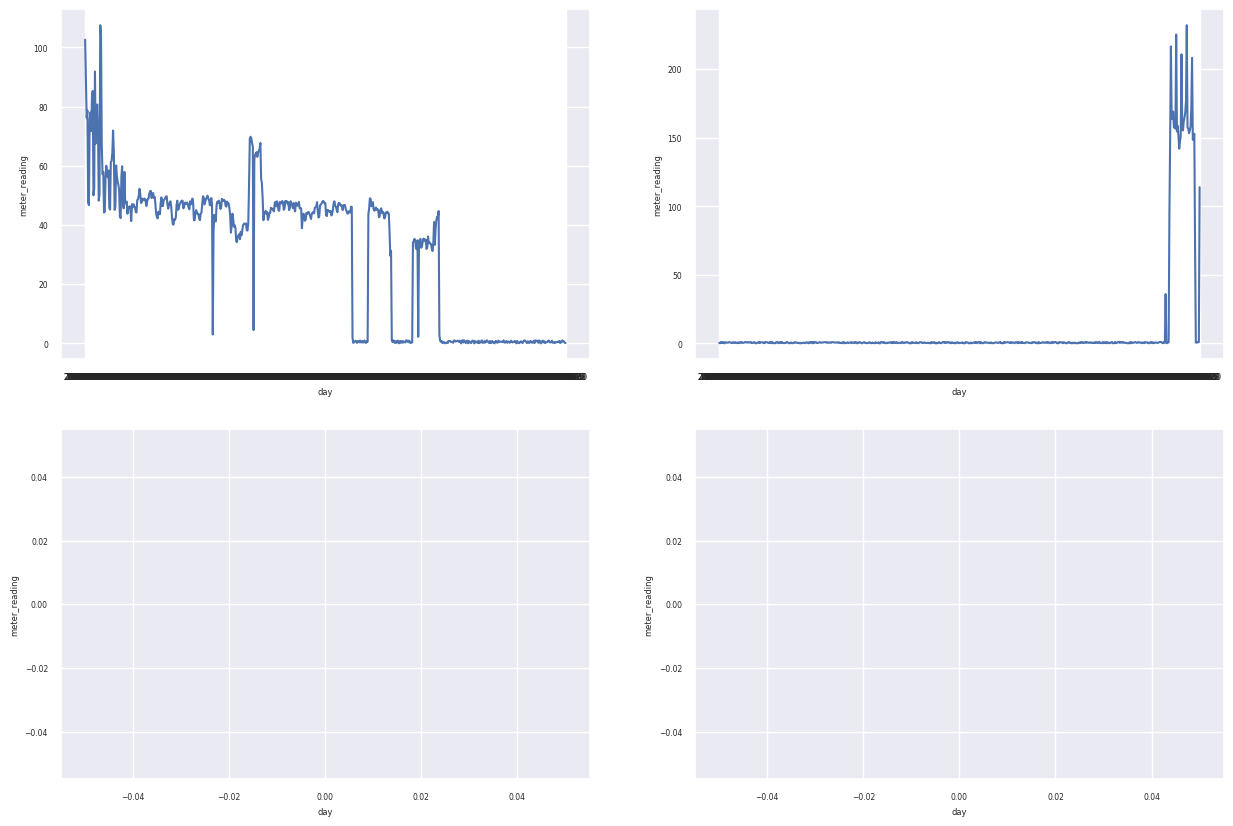

In [6]:
sns.set(font_scale=0.5, rc={'figure.figsize':(25,8)})
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i in range(4):
    sns.lineplot(data=full_df.loc[full_df["building_id"]==2].loc[full_df["meter"]==i], 
                 x="day", y=target, ax=axes[int(i/2)][i%2])

In [7]:
full_df["day"] = full_df["day"].apply(lambda s: datetime.strptime(s, "%Y-%m-%d"))
full_df["year"] = full_df["day"].apply(lambda s: s.year)
full_df["month"] = full_df["day"].apply(lambda s: s.month)
full_df["day_number"] = full_df["day"].apply(lambda s: s.day)
full_df["weekday"] = full_df["day"].apply(lambda s: s.weekday() in [5,6])

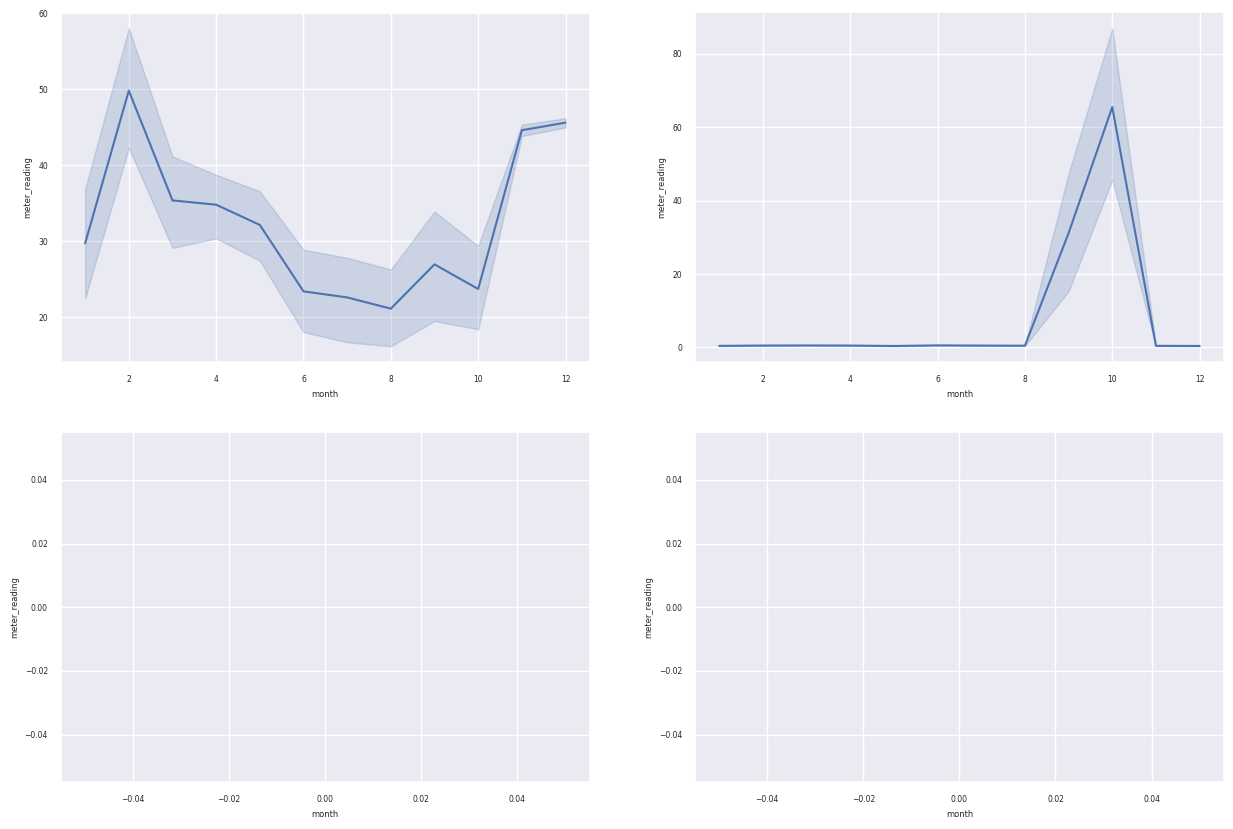

In [8]:
sns.set(font_scale=0.5, rc={'figure.figsize':(25,8)})
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i in range(4):
    sns.lineplot(data=full_df.loc[full_df["building_id"]==2].loc[full_df["meter"]==i], 
                 x="month", y=target, ax=axes[int(i/2)][i%2])

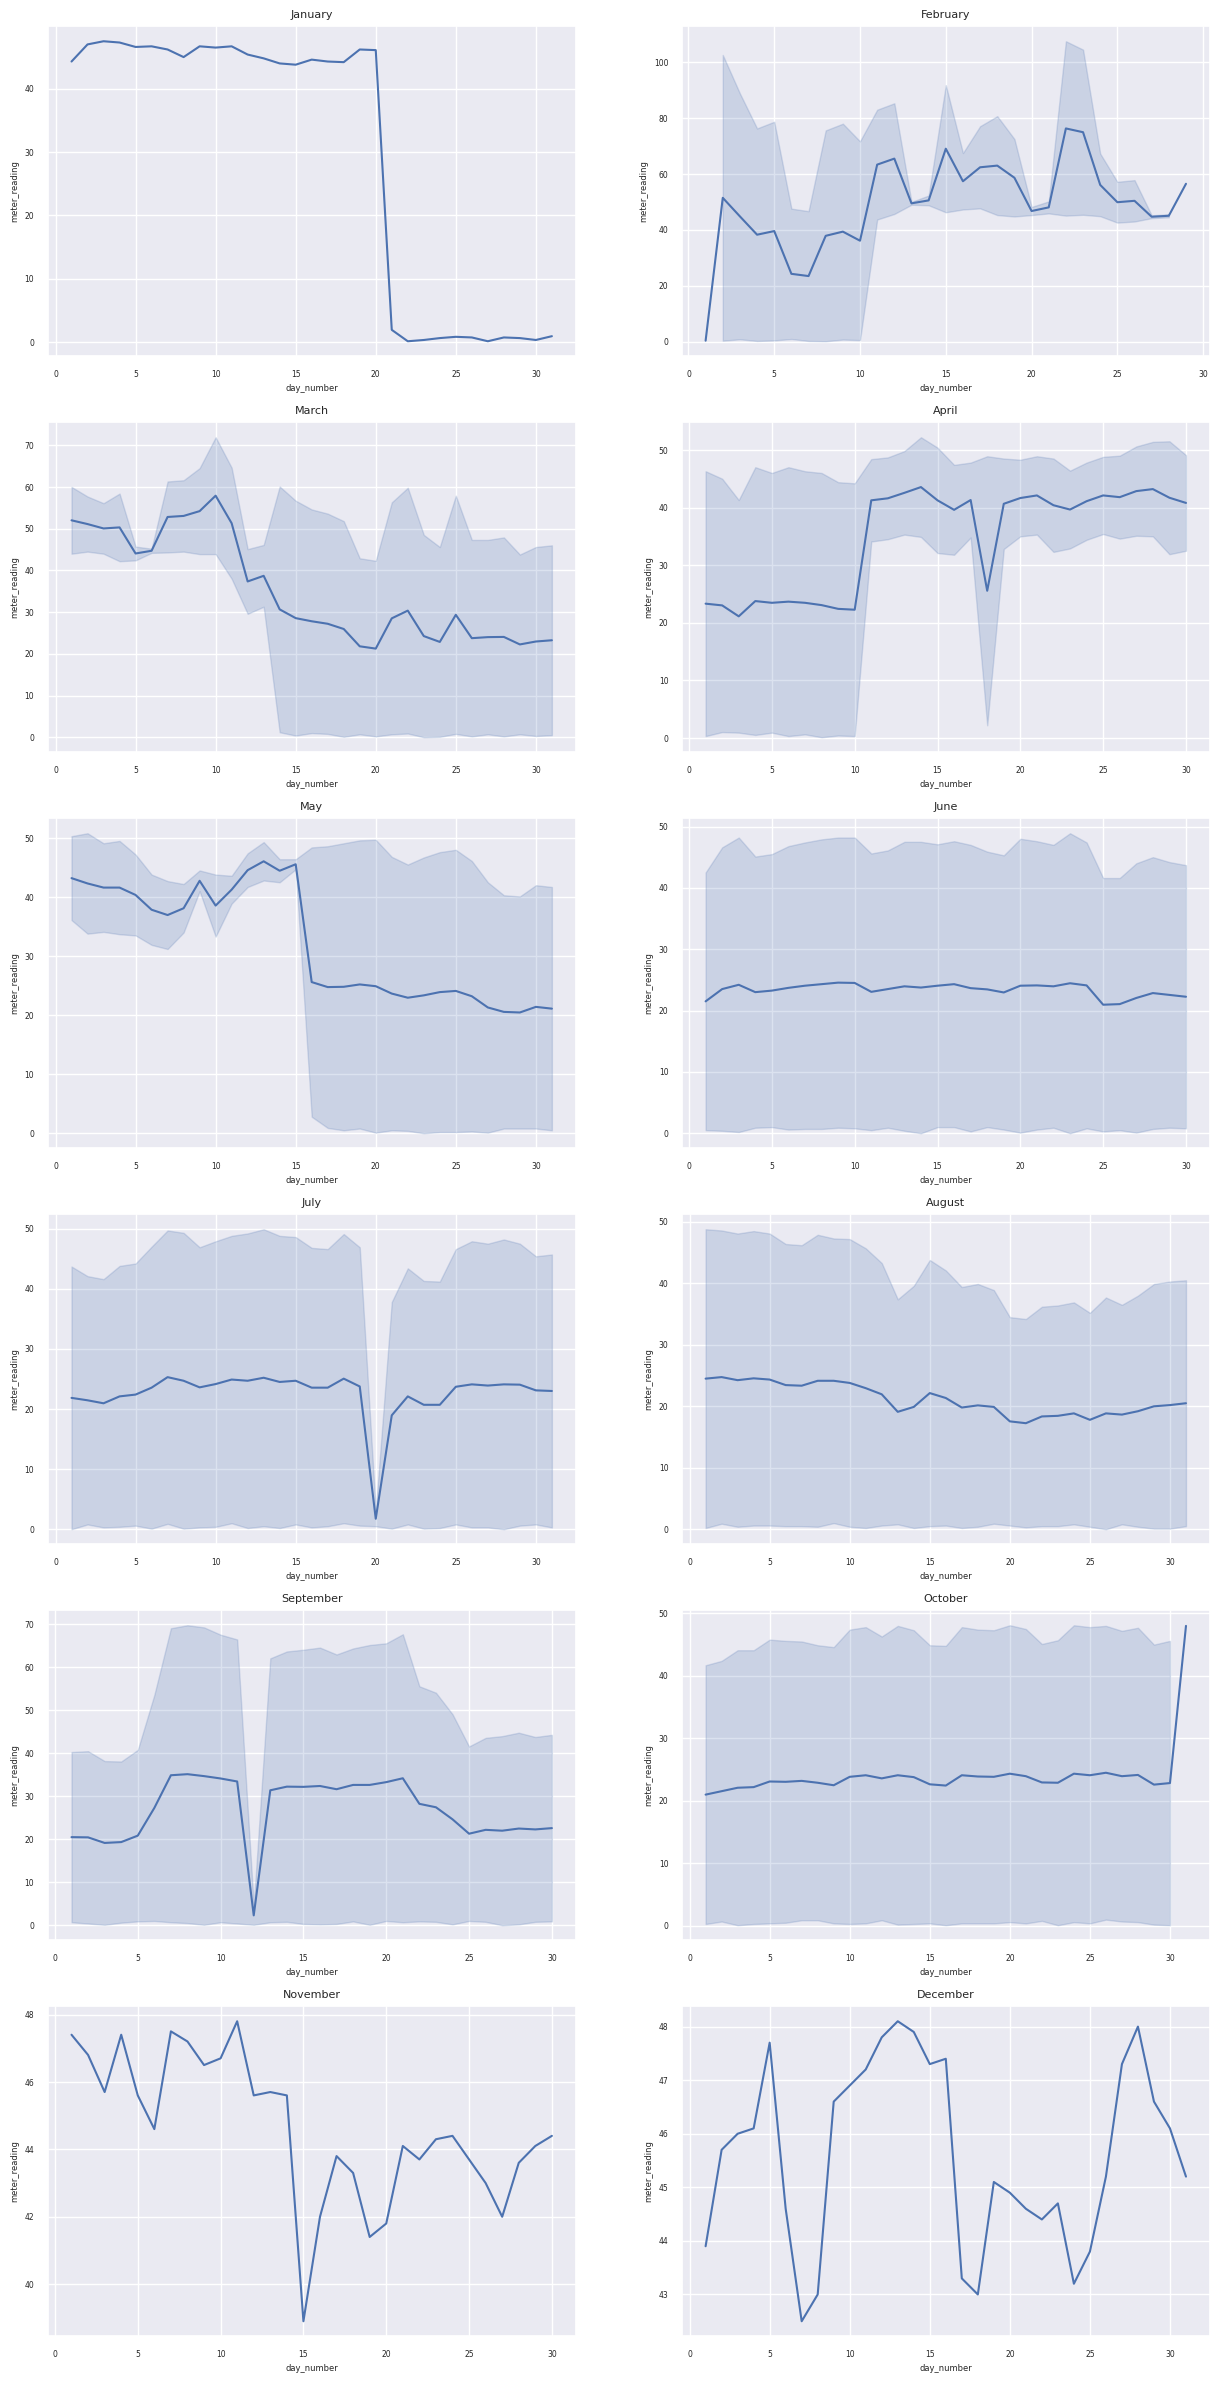

In [9]:
sns.set(font_scale=0.5, rc={'figure.figsize':(25,8)})
fig, axes = plt.subplots(6, 2, figsize=(15, 30))
for i in range(12):
    sns.lineplot(data=full_df.loc[full_df["building_id"]==2].loc[full_df["meter"]==0].loc[full_df["month"]==i+1], 
                 x="day_number", y=target, ax=axes[int(i/2)][i%2])
    axes[int(i/2)][i%2].set_title(calendar.month_name[i+1], fontsize=8)

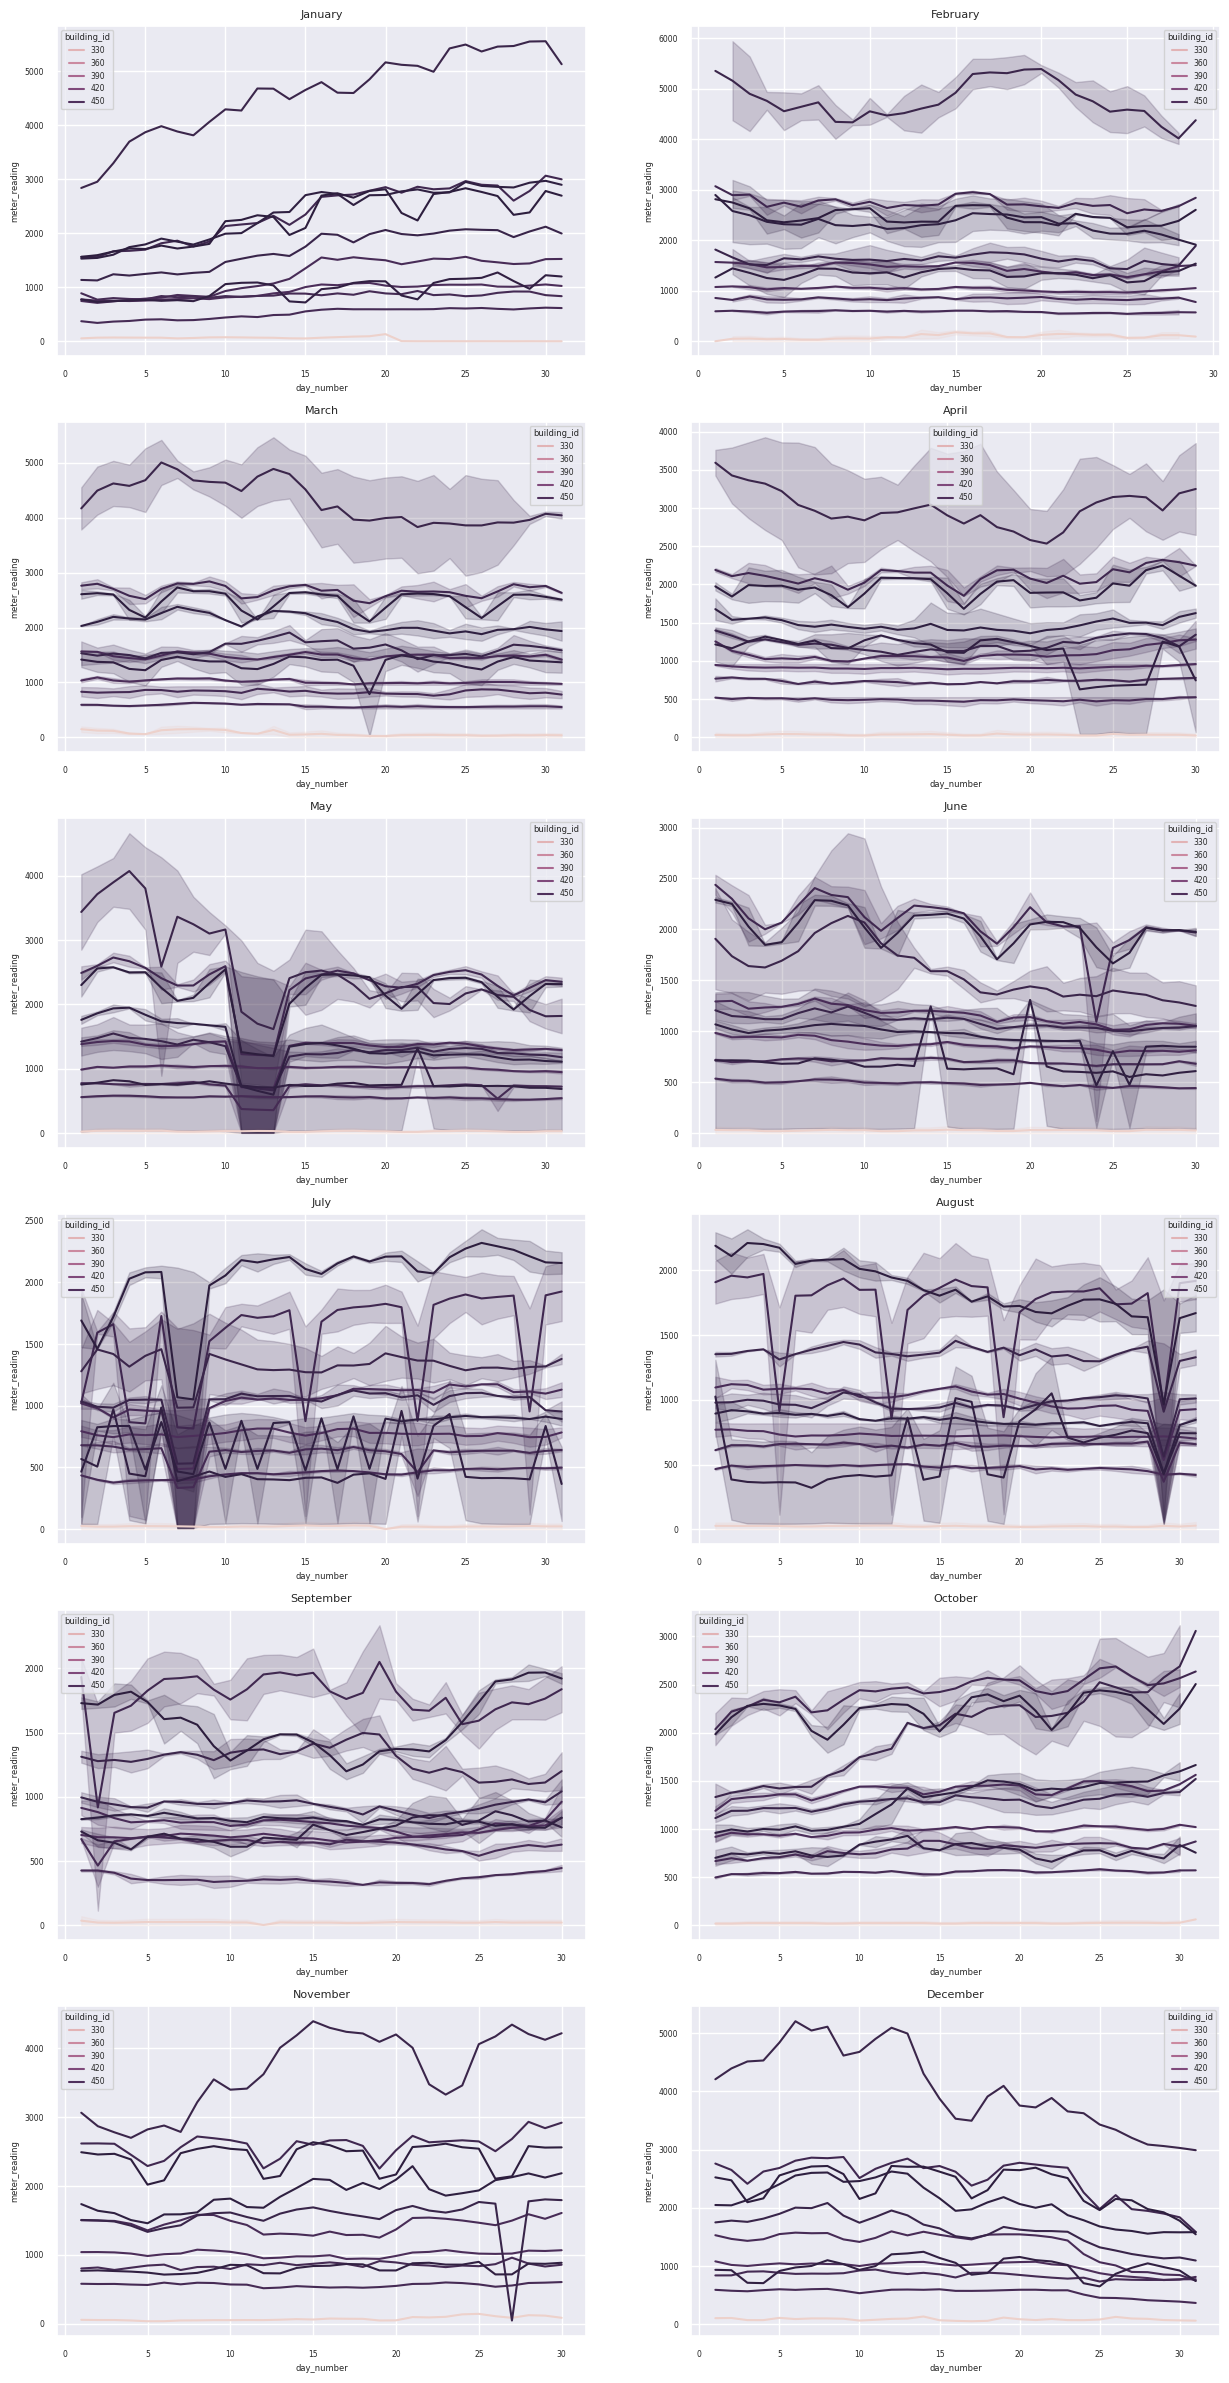

In [15]:
sns.set(font_scale=0.5, rc={'figure.figsize':(25,8)})
fig, axes = plt.subplots(6, 2, figsize=(15, 30))
for i in range(12):
    sns.lineplot(data=full_df.loc[full_df["sub_primaryspaceusage"]==7].loc[full_df["meter"]==0].loc[full_df["month"]==i+1], 
                 x="day_number", y=target, hue="building_id", ax=axes[int(i/2)][i%2])
    axes[int(i/2)][i%2].set_title(calendar.month_name[i+1], fontsize=8)

#### 🫧 Autoregression

In [12]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [14]:
scores = cross_val_score(Ridge(), X.drop(columns=["day"]), Y, cv=5)
print(scores)

[ -3.48903687  -7.76674481 -19.54961013  -1.77227392  -0.02760358]


##### 🪸 Visual

#### 🧩 Task III - Showing new features to the models

#### ⚙️ Solution

### 🧬 Resources

* [mlcourse.ai](https://mlcourse.ai/book/index.html)